## Project:- Gender Recognitionn system using Tensor flow CNN

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import os
import cv2


In [6]:
import pathlib
import PIL

In [7]:
data_dir='./train'

In [8]:
data_dir=pathlib.Path(data_dir)

In [10]:
data_dir

WindowsPath('train')

In [11]:
img=list(data_dir.glob('*/*.jpg'))[:1]
print(img)

[WindowsPath('train/man/face_0.jpg')]


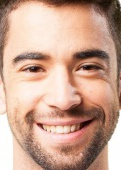

In [12]:
PIL.Image.open(str(img[0]))

In [13]:
str(img[0])

'train\\man\\face_0.jpg'

#### Read images from disk into numpy array using openCV

In [19]:
images_dict={
    'man': list(data_dir.glob('man/*')),
    
    'woman':list(data_dir.glob('woman/*')),
}

In [20]:
images_dict['man'][:5]

[WindowsPath('train/man/face_0.jpg'),
 WindowsPath('train/man/face_1.jpg'),
 WindowsPath('train/man/face_10.jpg'),
 WindowsPath('train/man/face_1000.jpg'),
 WindowsPath('train/man/face_1001.jpg')]

In [21]:
images_labels_dict={
    'man':1,
    'woman':0,
}

In [22]:
images_labels_dict

{'man': 1, 'woman': 0}

In [23]:
img=str(images_dict['man'][0])

In [24]:
img=cv2.imread(img)

In [25]:
img.shape

(170, 121, 3)

In [26]:
img=cv2.resize(img, (180,180))

In [27]:
img.shape

(180, 180, 3)

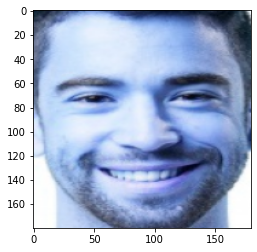

In [30]:
plt.imshow(img)

appending images and labels in X,y

In [32]:
X, y = [], []

for face_name, images in images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(images_labels_dict[face_name])

In [33]:
import numpy as np

In [34]:
X = np.array(X)
y = np.array(y)

In [35]:
X.shape

(2307, 180, 180, 3)

In [36]:
y.shape

(2307,)

#### Train Test Split

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#### Scaling images 

In [38]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

#### Build convolutional neural network and train it

In [39]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow as tf

In [67]:
num_classes = 1

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
#   layers.Conv2D(64, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
  layers.Flatten(),

    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    
  layers.Dense(num_classes, activation= 'sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=20)              

Epoch 1/20
55/55 [==============================] - 69s 919ms/step - loss: 0.7972 - accuracy: 0.5829
Epoch 2/20
55/55 [==============================] - 47s 862ms/step - loss: 0.4858 - accuracy: 0.7692
Epoch 3/20
55/55 [==============================] - 48s 869ms/step - loss: 0.3023 - accuracy: 0.8662
Epoch 4/20
55/55 [==============================] - 48s 867ms/step - loss: 0.3512 - accuracy: 0.8401
Epoch 5/20
55/55 [==============================] - 50s 903ms/step - loss: 0.1954 - accuracy: 0.9166
Epoch 6/20
55/55 [==============================] - 47s 861ms/step - loss: 0.1415 - accuracy: 0.9427
Epoch 7/20
55/55 [==============================] - 44s 807ms/step - loss: 0.1040 - accuracy: 0.9661
Epoch 8/20
55/55 [==============================] - 46s 837ms/step - loss: 0.0751 - accuracy: 0.9761
Epoch 9/20
55/55 [==============================] - 47s 851ms/step - loss: 0.0520 - accuracy: 0.9859
Epoch 10/20
55/55 [==============================] - 49s 896ms/step - loss: 0.0894 - accura

In [68]:
# model.predict(X_test)

#### model evaluation

In [70]:
print(model.evaluate(X_test,y_test))

19/19 [==============================] - 5s 255ms/step - loss: 54.7412 - accuracy: 0.9064
[54.74124526977539, 0.9064124822616577]


In [71]:
y_test[0]

1

In [72]:
img=X_test[0]


In [73]:
img.shape

(180, 180, 3)

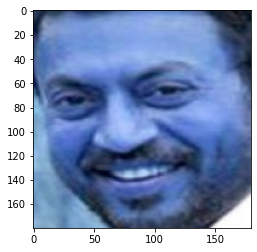

In [74]:
plt.imshow(img)

In [75]:
predictions=model.predict(X_test)

In [76]:
predictions[:5]

array([[1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)

In [77]:
y_pred = []
for element in predictions:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [78]:
y_pred[:5]

[1, 0, 0, 1, 0]

In [79]:
import pandas as pd

In [80]:
df1=pd.DataFrame()

In [81]:
df1=pd.DataFrame(y_pred)

In [82]:
df1['truth']=pd.DataFrame(y_test)

In [83]:
df1['Predictions']=pd.DataFrame(y_pred)

In [84]:
df1.drop(0,axis=1,inplace=True)

In [85]:
df1.head(10)

,truth,Predictions
0,1,1
1,0,0
2,0,0
3,0,1
4,0,0
5,1,1
6,1,1
7,0,0
8,0,0
9,1,1


In [62]:
model.save('gender_detection1.model')

INFO:tensorflow:Assets written to: gender_detection1.model\assets
